In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression

In [39]:
df = pd.read_csv("House.csv")

# Question 1

In [40]:
column_dtypes = df.dtypes
print(column_dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


# Question 2

In [41]:
columns_to_drop = ['id', 'Unnamed: 0']
df.drop(columns_to_drop, axis=1, inplace=True)

summary = df.describe()

print(summary)

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

# Question 3

In [42]:
floor_counts = df['floors'].value_counts()

floor_counts_df = floor_counts.to_frame(name='counts')

print(floor_counts_df)

        counts
floors        
1.0      10680
2.0       8241
1.5       1910
3.0        613
2.5        161
3.5          8


# Question 4

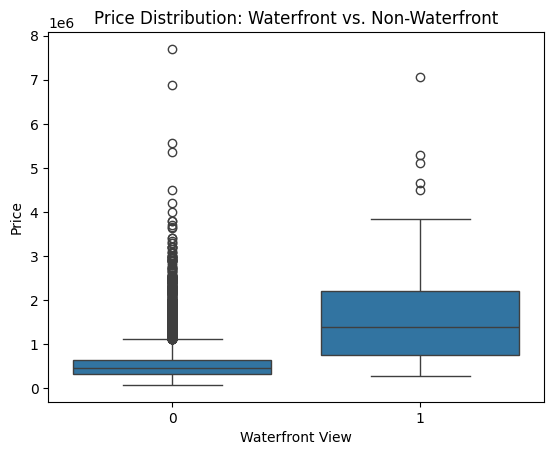

In [43]:
sns.boxplot(x='waterfront', y='price', data=df)

plt.xlabel('Waterfront View')
plt.ylabel('Price')
plt.title('Price Distribution: Waterfront vs. Non-Waterfront')

plt.show()

# Question 5

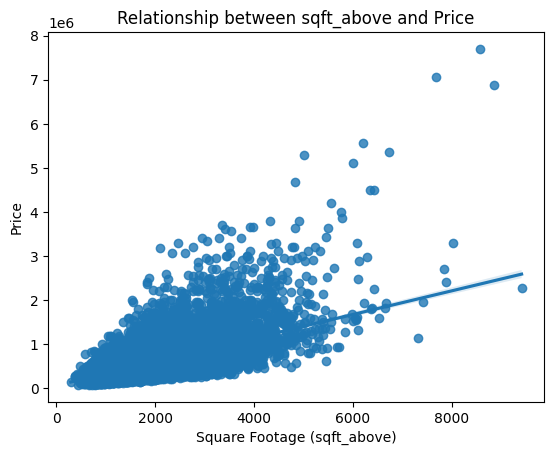

In [44]:
sns.regplot(x='sqft_above', y='price', data=df)
plt.xlabel('Square Footage (sqft_above)')
plt.ylabel('Price')
plt.title('Relationship between sqft_above and Price')
plt.show()

In [45]:
x = df['sqft_above']
y = df['price']
x_mean = np.mean(x)
y_mean = np.mean(y)
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator_x = np.sqrt(np.sum((x - x_mean) ** 2))
denominator_y = np.sqrt(np.sum((y - y_mean) ** 2))
r = numerator / (denominator_x * denominator_y)
if r > 0:
    print("The correlation between sqft_above and price is positively correlated.")
elif r < 0:
    print("The correlation between sqft_above and price is negatively correlated.")
else:
    print("There is no linear correlation between sqft_above and price.")

The correlation between sqft_above and price is positively correlated.


# Question 6

R-squared value: 0.4941


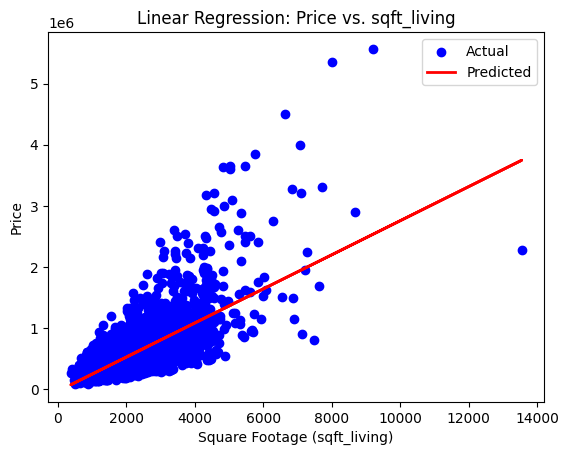

In [46]:
X = df[['sqft_living']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2:.4f}")

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Square Footage (sqft_living)')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs. sqft_living')
plt.legend()
plt.show()

# Question 7

In [47]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())
mean=df['bedrooms'].mean()
df.replace({'bedrooms': np.nan}, mean, inplace=True)

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [48]:
mean=df['bathrooms'].mean()
df.replace({'bathrooms': np.nan}, mean, inplace=True)

In [51]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2:.4f}")

R-squared value: 0.6614


# Question 8

In [50]:
X, y = make_regression(n_samples=1000, n_features=100, noise=10, bias=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('preprocessor', PolynomialFeatures(degree=3, include_bias=False)),
    ('estimator', Ridge(alpha=1))  
])

pipe.fit(X_train, y_train)

y_pred_train_pipe = pipe.predict(X_train)
y_pred_test_pipe = pipe.predict(X_test)

r2_train = pipe.score(X_train, y_train)
r2_test = pipe.score(X_test, y_test)

print("R^2 on training data:", r2_train)
print("R^2 on testing data:", r2_test)

R^2 on training data: 0.9999999999787197
R^2 on testing data: 0.463044896596684


# Question 9

In [52]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predictions on test data
y_pred_test = ridge_model.predict(X_test)

# Calculate R^2
r2_test = r2_score(y_test, y_pred_test)
print("R^2 on test data:", r2_test)

R^2 on test data: 0.6613982983090944


# Question 10

In [54]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(X_train)
x_test_pr = pr.transform(X_test)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train_pr, y_train)

y_pred_test = ridge_model.predict(x_test_pr)

r2_test = r2_score(y_test, y_pred_test)
print("R^2 on test data:", r2_test)

R^2 on test data: 0.7000720075763653
